<a href="https://colab.research.google.com/github/dalebancroft/ut-aiml/blob/main/Project%205%20-%20Computer%20Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Computer Vision: Plant Seedlings Classification

## Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 opencv-python==4.8.0.76 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 72.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 49.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 65.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 82.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 72.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 59.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 98.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.6 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you pref

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# Libraries to help with reading and manipulating data
import os
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries to support data preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

# Libraries to support model creation
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD
import random
from tensorflow.keras import backend

# Libraries to manage model training and learning rates
from keras.callbacks import ReduceLROnPlateau

# Libraries to evaluate model performance
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Libraries to support image manipulation and display
import cv2
from google.colab.patches import cv2_imshow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Library to ignore warning notifications
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [ ]:
# Mounting Google Drive for importing data into Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the image file of dataset
images = np.load('/content/drive/MyDrive/Study_Materials/PGP-AIML/05.Computer_Vision/Project_5_Plant_Seedling_Classification/images.npy')

# Load the labels file of dataset
labels = pd.read_csv('/content/drive/MyDrive/Study_Materials/PGP-AIML/05.Computer_Vision/Project_5_Plant_Seedling_Classification/Labels.csv')

## Data Overview

First, the size of the data set, including the shape and channels associated with each image in the image library, will be confirmed.

In [ ]:
# Checking number, size and channels associated with image files
print("There are",images.shape[0],"images.")
print("Each image has a size of",images.shape[1],"by", images.shape[2],"pixels.")
print("Each image is comprised of",images.shape[3],"color channels.")

There are 4750 images.
Each image has a size of 128 by 128 pixels.
Each image is comprised of 3 color channels.


The number of labels provided will also be checked, to confirm that it matches the number of images in the data set.

In [ ]:
# Confirming number of data labels received.
print("There are",labels.shape[0],"labels.")

There are 4750 labels.


## Exploratory Data Analysis

###Step 1 - Visualizing a random sample of images

There are 12 different classes of plant in the image data set. To better understand these classes, a random image from each class will be displayed.

In [ ]:
# Function which will display a random image from each class

def plot_random_image_per_class(images, labels):

    unique_labels = np.unique(labels['Label'])
    num_classes = len(unique_labels)

    fig, axes = plt.subplots(3, 4, figsize=(12, 10))
    axes = axes.ravel()  # Flatten the axes array for easier iteration

    for i, label in enumerate(unique_labels):

        # Find indices of images belonging to the current class
        class_indices = np.where(labels['Label'] == label)[0]

        # Choose a random index from the current class' indices
        random_index = np.random.choice(class_indices)

        # Display the image
        axes[i].imshow(images[random_index])
        axes[i].set_title(label)
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

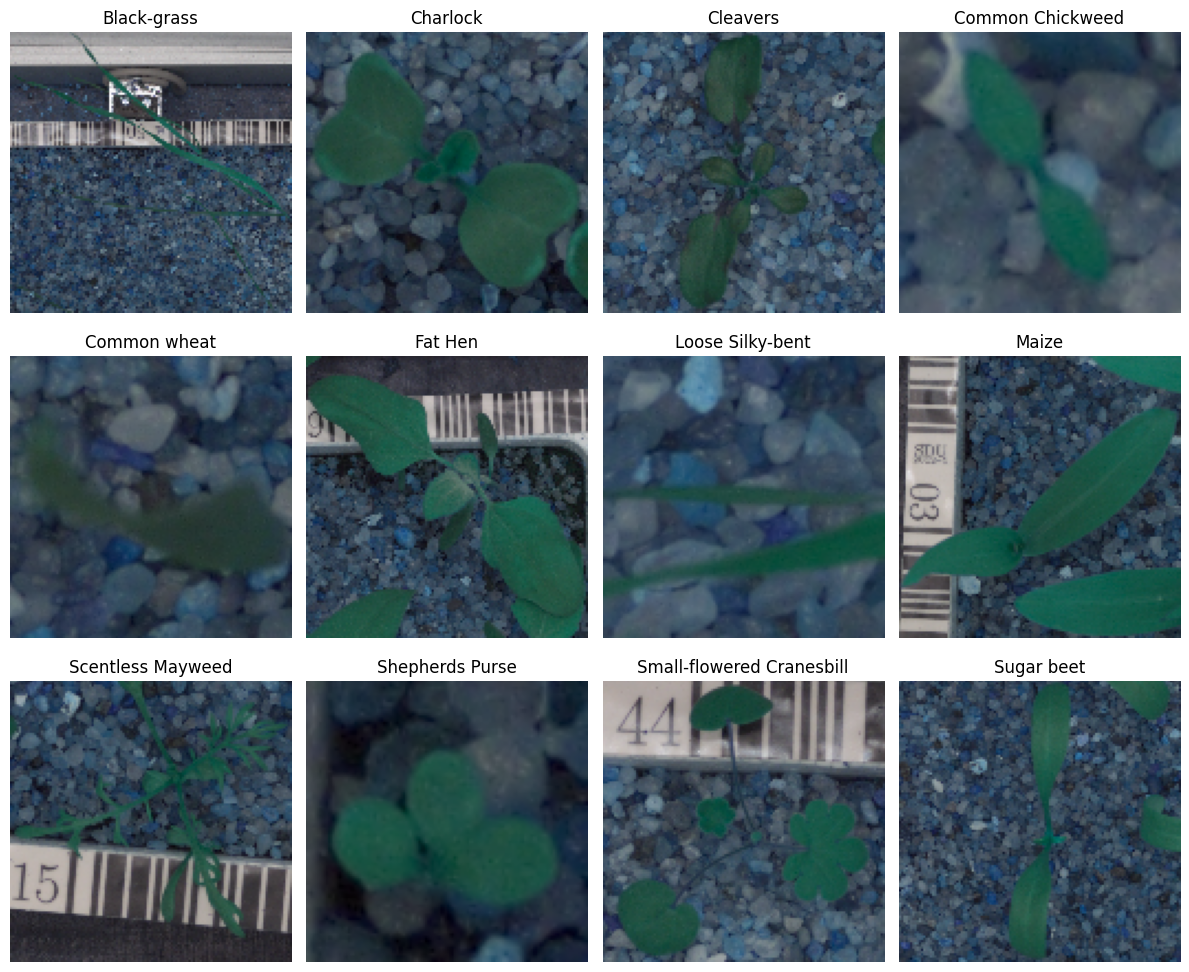

In [ ]:
# Display a random image from each class
plot_random_image_per_class(images, labels)

**Observations**

* From the sample displayed, it can be noted that each image is an identical size, but may have different levels of zoom and focus.
* An initial review suggests that each plant class possess certain visual characteristics that differentiate them from one another.
  * For example, the **Blackgrass** and **Loose Silky-bent** specimens displayed above both possess narrow leaves.
  * The **Common Chickweed**, **Common wheat**, **Maize** and **Sugar Beet** specimens displayed above each possess a single pair of broad, long leaves pointing in opposite directions.
  * The **Cleavers**, **Fat Hen** and **Small-flowered Cranesbill** specimens displayed above each possess 4 or more leaves pointing in random directions from the stalk.
  * The **Cleavers** specimen displayed above possesses a darker hue of leaf color compared to the specimens displayed for all other classes.
  * The **Small-flowered Cranesbill** specimen displayed above possesses a unique blue stalk.
  * A CNN model trained on these images may identify additional characteristics to focus on when assigning each image to a predicted class.
* The blue tint of each image suggests these are being displayed in BGR color format - these will need to be converted to RGB color format in order to be processed by the Matpotlib library effectively.
* The plants are not perfectly centered in each image.
* Some images include measuring equipment adjacent to the plant.

The CNN model will need to account for different levels of zoom, focus and the presence of non-plant objects in some of the images.

###Step 2 - Review distribution of image labels

The distribution of labels within the data set is plotted below.

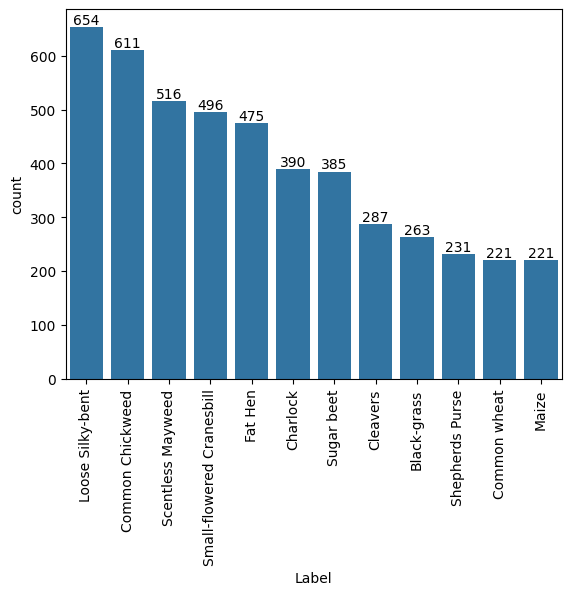

In [ ]:
# Obtain value counts for each label
label_counts = labels['Label'].value_counts()

# Plot count of each label in data set, ordered by frequency
ax=sns.countplot(x='Label', data=labels, order=label_counts.index)
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0])
plt.show()

The breakdown of labels by percentage is summarized below.

In [ ]:
# Calculate the percentage of samples for each class
label_percentages = ((label_counts / len(labels)) * 100).round(2)

# Create a DataFrame
class_distribution_df = pd.DataFrame({
    'Class': label_counts.index,
    'Number of Samples': label_counts.values,
    'Percentage': label_percentages.values
})

class_distribution_df

,Class,Number of Samples,Percentage
0,Loose Silky-bent,654,13.77
1,Common Chickweed,611,12.86
2,Scentless Mayweed,516,10.86
3,Small-flowered Cranesbill,496,10.44
4,Fat Hen,475,10.00
5,Charlock,390,8.21
6,Sugar beet,385,8.11
7,Cleavers,287,6.04
8,Black-grass,263,5.54
9,Shepherds Purse,231,4.86


**Observations**

This is an unbalanced dataset, with the largest class (**Loose Silky-bent**) making up 13.77% of the total population.

Conversely, the two smallest classes (**Common wheat** and **Maize**) each make up only 4.65% of the population.

This may impact the bias of the CNN model, which will need to be monitored for during the model evaluation process.

## Data Pre-Processing

### Step 1 - Convert images from BGR to RGB

Currently, the images are stored using BGR color format. This can be seen by the difference in images when they are displayed using OpenCV's cv2.imread() function, as opposed to Matplotlib's plt.imshow() function.

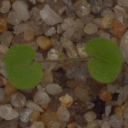

In [ ]:
# Output the first image in the dataset using OpenCV function
cv2_imshow(images[0])

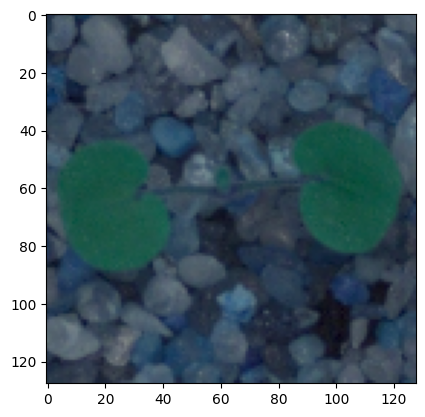

In [ ]:
# Output the first image in the dataset using Matplotlib function
plt.imshow(images[0])

As Matplotlib expects images to be stored in an RGB color format, the images in the data set will first need to be converted from BGR to RGB color format.

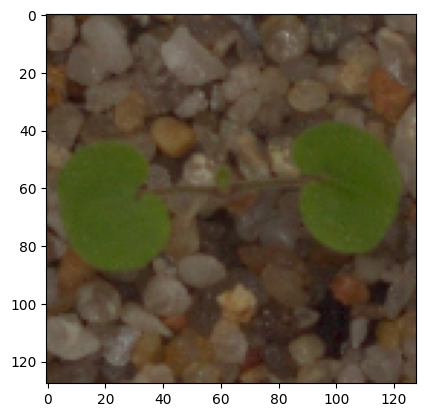

In [ ]:
# Convert images from BGR to RGB
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

# Display forst image using Matplotlib to confirm conversion to RGB format
plt.imshow(images[0])

The images have now been converted to RGB format, and are displayed by Matplotlib's plt.imgshow() function correctly.

### Step 2 - Reduce image size

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

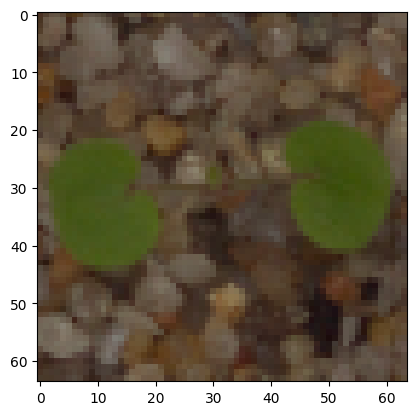

In [ ]:
# Create a list to store resized images
images_decreased = []

# Set new image dimensions
dimensions = (64,64)

# Resize images to new dimensions and add to array
for i in range(len(images)):
  images_decreased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

# Display reized image to confirm
plt.imshow(images_decreased[0])

The images have now been halved in size, from 128 x 128 pixels to 64 x 64 pixels. This will improve the performance of training the CNN model, as there will be fewer pixels to work through on each image.

### Step 3 - Split data sets

As with building any machine learning model or artificial neural network, prior to creating a convolutional neural network for image recognition, the data set must be split into training, validation and test sets.

In [ ]:
# Initial split of the data set into a training data set making up 80% of the population and a temporary data set making up 20% of the population
X_train, X_temp, y_train, y_temp = train_test_split(np.array(images_decreased),labels, test_size=0.2, random_state=1,stratify=labels)

# Then split the temporary set into equal sized validation and testing data sets each making up 10% of the original population
X_val, X_test, y_val, y_test = train_test_split(X_temp,y_temp,test_size=0.5,random_state=1,stratify=y_temp)

# Output the shape of the training, validation and test data sets
print("Training data set shape: ",X_train.shape)
print("Validation data set shape: ",X_val.shape)
print("Test data set shape: ",X_test.shape)

Training data set shape:  (3800, 64, 64, 3)
Validation data set shape:  (475, 64, 64, 3)
Test data set shape:  (475, 64, 64, 3)


In order for the model training, validation and testing to be effective, each data set needs a similar balance of plant classes.

In [ ]:
# Obtain percentage of classes in each data set
train_percentages = (((y_train['Label'].value_counts()) / len(y_train)) * 100).round(2)
val_percentages = (((y_val['Label'].value_counts()) / len(y_val)) * 100).round(2)
test_percentages = (((y_test['Label'].value_counts()) / len(y_test)) * 100).round(2)

# Create a DataFrame
class_distribution_df = pd.DataFrame({
    'Class': label_counts.index,
    'Original %': label_percentages.values,
    'Training %': train_percentages.values,
    'Validation %': val_percentages.values,
    'Test %': test_percentages.values
})

# Display the DataFrame
class_distribution_df

,Class,Original %,Training %,Validation %,Test %
0,Loose Silky-bent,13.77,13.76,13.89,13.68
1,Common Chickweed,12.86,12.87,12.84,12.84
2,Scentless Mayweed,10.86,10.87,10.74,10.95
3,Small-flowered Cranesbill,10.44,10.45,10.53,10.32
4,Fat Hen,10.00,10.00,10.11,9.89
5,Charlock,8.21,8.21,8.21,8.21
6,Sugar beet,8.11,8.11,8.00,8.21
7,Cleavers,6.04,6.03,6.11,6.11
8,Black-grass,5.54,5.53,5.47,5.68
9,Shepherds Purse,4.86,4.87,4.84,4.84


All 3 new data sets share a similar distribution for each of the 12 classes, and are comparable to the class distribution in the original data set.

### Step 4 - Encode target variables

As with artificial neural networks, when training a convolutional neural network, the target variables (in this case the image labels) need to be encoded prior to model building.

For a data set with 12 possible labels, this can be done by converting each label value into a NumPy array made up of 12 values, with the location of an integer in the array corresponding to the label each array represents.

In [ ]:
# Storing the LabelBinarizer function in lb variable
lb = LabelBinarizer()

# Applying fit and transform on train target variable
y_train_e = lb.fit_transform(y_train)
# Applying transform on validation target variable
y_val_e = lb.transform(y_val)
# Applying transform on test target variable
y_test_e = lb.transform(y_test)

In [ ]:
# Output original and encoded versions of first image label
# Output original and encoded versions of first image label
print("Original label of first image in training data set is:",y_train['Label'][0])
print("Encoded label of first image in training data set is:",y_train_e[0])
print("\n")
print("Size of original training label data set is",y_train.shape)
print("Size of encoded training label data set is",y_train_e.shape)

Original label of first image in training data set is: Small-flowered Cranesbill
Encoded label of first image in training data set is: [0 0 0 0 0 0 1 0 0 0 0 0]


Size of original training label data set is (3800, 1)
Size of encoded training label data set is (3800, 12)


As shown above, the image labels have now been encoded and replaced with arrays made up of 12 values each.

### Step 5 - Normalize data values

Each image is made up of pixels with an assigned value of between 0 and 255. For a color image with 3 color channels, each pixel has 3 values assigned (one per channel).

To improve model performance, prior to model building these values will be normalized and set to new values of between 0 and 1.

These smaller pixel values will help speed up model training time, and reduce the risk of exploding gradients occurring, improving model stability.

In [ ]:
# Divide all pixel values in each image set by 255 to get values of between 0 and 1
X_train_normalized = X_train.astype('float32')/255
X_val_normalized = X_val.astype('float32')/255
X_test_normalized = X_test.astype('float32')/255

## Model Building

###Initial model - Building

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

The initial Convolutional Neural Network (CNN) model is built sequentially using layers in a similar manner to an Artificial Neural Network (ANN).

However, a CNN used for image recognition will make use of several unique layers not found in a standard ANN:
* A **Convolution Layer** is used to pass a set of convolution filters over each pixel in the image and transform them to generate a numeric output. These transformation functions are learned by the model as part of the training process.
* A **Pooling** layer summarizes the values generated for each filter region of the image, and is used to create a downsized (pooled) version of the image for future iterations. This helps to reduce image complexity and highlight only the most relevant features in each filter region of the image.
* A **Flatten** layer is required to convert the image pixel values into a 2D array, which can then be processed by a standard fully connected neural network layer of neurons. It is these subsequent fully connected neuron layers which will process the convolution values to select the predicted class for each image.

The baseline CNN model will be built with the following parameters:
* Using a set of three **Convolution** layers made up of 64 filters with a 3x3 kernel size and **relu** activation function.
  * A padding value of **same** will be applied to ensure the size of the output image is identical to the size of the input image.
* Following each convolution layer with a **Pooling** layer, consolidating each 3x3 filter kernel into a 2x2 output. Again, padding will be applied to ensure the output is identical in size to the input to avoid shrinkage of the image between layers.
* A **Flatten** layer to convert the pixel values into a 2D array.
* A pair of fully connected **Dense** layers made up of 100 neurons each with **relu** activation function.
* A final **Dense** output layer of 12 neurons with **Softmax** activation function (required for models where a nonbinary prediction from multiple classes is generated).

In [ ]:
#Initializing the neural network
model = Sequential()

# Adding the first convolution layer with 64 filters and a kernel size of 3x3 , padding 'same' provides the output size same as the input size
model.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64,64,3)))

# Adding a max pooling to reduce the output size of the first convolution layer
model.add(MaxPooling2D((2, 2), padding = 'same'))

# Adding two more sets of convolution and pooling layers
model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model.add(Flatten())

# Adding a fully connected dense layer with 100 neurons
model.add(Dense(100, activation='relu'))

# Adding a fully connected dense layer with 100 neurons
model.add(Dense(100, activation='relu'))

# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model.add(Dense(12, activation='softmax'))

# Using Adam Optimizer
opt = Adam()

# Compile model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         204,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 12)                  │           1,212 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 245,716 (959.83 KB)

 Trainable params: 245,716 (959.83 KB)

 Non-trainable params: 0 (0.00 B)

This initial model has been built with 245,716 trainable parameter values. The majority of those trainable parameters reside in the first fully connected dense layer of 100 neurons, rather than the preceeding 3 convolution layers.

###Initial model - fitting to training data

The compiled model will now be fitted on the training data set for 30 epochs.

In [ ]:
# Fit initial CNN model to training data for 30 training epochs, with 10% of training data reserved for validation
history_1 = model.fit(
            X_train_normalized, y_train_e,
            epochs=30,
            validation_data=(X_val_normalized,y_val_e),
            batch_size=32,
            verbose=2
)

Epoch 1/30
119/119 - 13s - 108ms/step - accuracy: 0.2068 - loss: 2.2796 - val_accuracy: 0.3579 - val_loss: 1.8855
Epoch 2/30
119/119 - 1s - 6ms/step - accuracy: 0.4063 - loss: 1.6423 - val_accuracy: 0.4947 - val_loss: 1.5004
Epoch 3/30
119/119 - 1s - 6ms/step - accuracy: 0.5455 - loss: 1.3083 - val_accuracy: 0.5789 - val_loss: 1.2480
Epoch 4/30
119/119 - 1s - 10ms/step - accuracy: 0.6268 - loss: 1.0652 - val_accuracy: 0.6358 - val_loss: 1.0910
Epoch 5/30
119/119 - 1s - 5ms/step - accuracy: 0.6724 - loss: 0.9449 - val_accuracy: 0.6421 - val_loss: 1.0047
Epoch 6/30
119/119 - 1s - 6ms/step - accuracy: 0.7226 - loss: 0.8193 - val_accuracy: 0.6842 - val_loss: 1.0098
Epoch 7/30
119/119 - 1s - 10ms/step - accuracy: 0.7582 - loss: 0.7038 - val_accuracy: 0.6737 - val_loss: 1.0683
Epoch 8/30
119/119 - 1s - 11ms/step - accuracy: 0.7897 - loss: 0.6123 - val_accuracy: 0.7011 - val_loss: 0.9451
Epoch 9/30
119/119 - 1s - 12ms/step - accuracy: 0.8203 - loss: 0.5267 - val_accuracy: 0.7158 - val_loss: 0

After 30 training epochs, the model achieved a validation accuracy score of 0.7600.

###Initial model - evaluation

Once the initial CNN model has been trained, the performance of the model over the training process can be plotted, to evaluate how model performance improved with each training epoch.

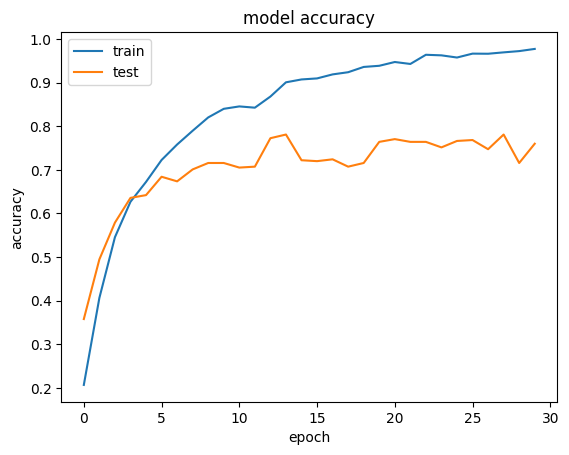

In [ ]:
# Plot model accuracy performance over epochs for training and validation data sets
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Observations**
* Accuracy increased at a similar rate for the model on both the training and validation datasets for the first ~4 epochs, reaching an Accuracy value of ~0.62.
* From the 5th epoch onwards, Accuracy performance against the training data set continued to increase, reaching 0.9774 by the 30th epoch.
* Conversely, Accuracy performance for the validation data increased at a reduced rate from the 5th epoch onwards, reaching 0.7600 by the 30th epoch.
  * This suggests that overfitting is beginning to occur from the 5th epoch onwards.

###Initial model - test data performance

Final performance of the initial model will be evaulated against the reserved test data set.

In [ ]:
# Applying the initial model against the test data set
model.evaluate(X_test_normalized,(y_test_e))

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7998 - loss: 1.2192 


[1.2365168333053589, 0.7768421173095703]

The initial model achieves an accuracy score of 0.7998 against the test data set.

###Initial model - confusion matrix

Following training, the model can be used to make predictions of specimen classes for each image in the reserved test data set.

In [ ]:
# Using the model to predict labels for the images in the test data set
y_pred=model.predict(X_test_normalized)

# Obtaining the labels assigned to each image from the predictions and test data set
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_e,axis=1)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


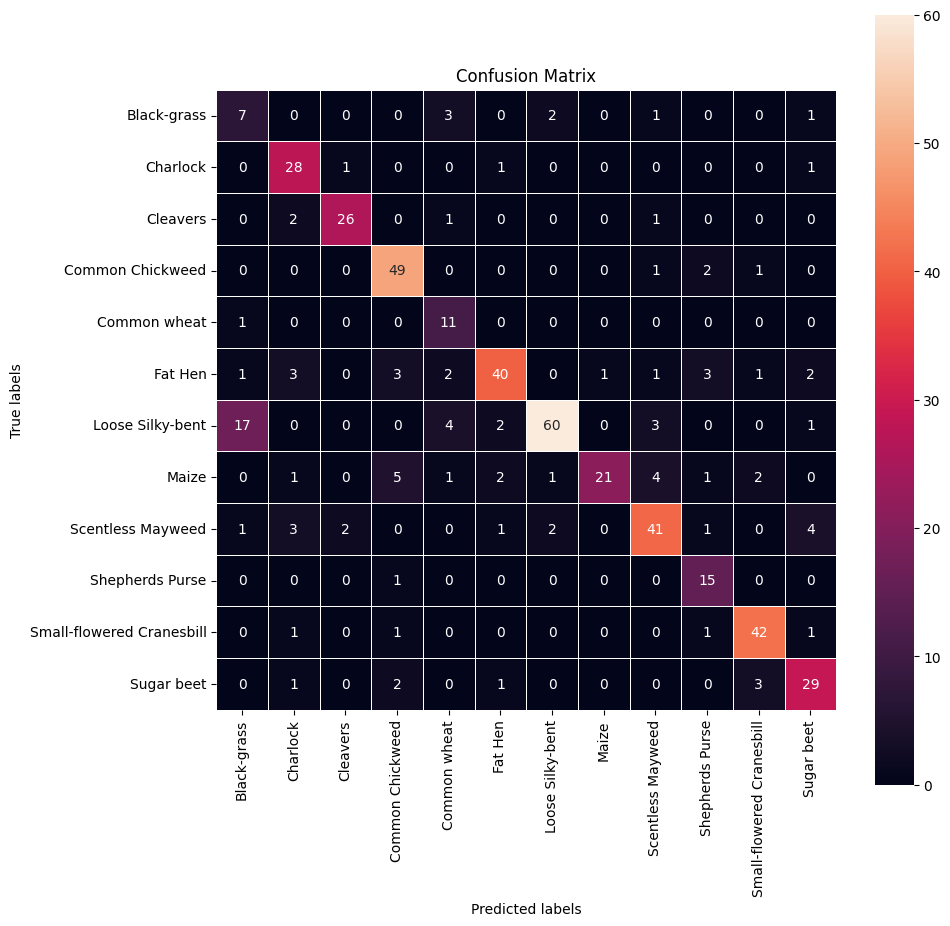

In [ ]:
# Plotting the Confusion Matrix using the tensorflow function
confusion_matrix = tf.math.confusion_matrix(y_pred_arg,y_test_arg)
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(lb.classes_),rotation=90)
ax.yaxis.set_ticklabels(list(lb.classes_),rotation=0)
plt.show()

**Observations**

* None of the classes have achieved a perfect accuracy - the initial model makes errors when predicting the label for all 12 classes present in the test data.
* The model seems to have particular difficulty in differentiating between **Black-grass** and **Loose Silky-bent**.
  * Both plants possess a long, narrow, blade-like leaf, which may impact model predictions.
* The model seems particularly effective at predicting **Small-flowered Cranesbill**, predicting the correct label for 42 out of 46 images in the test data set.
  * This may be due to the distinct blue stalks that are unique only to this class of plant.

###Initial model - classification report

In [ ]:
# Plotting the classification report
print(classification_report(y_test_arg, y_pred_arg, target_names=lb.classes_))

                           precision    recall  f1-score   support

              Black-grass       0.50      0.26      0.34        27
                 Charlock       0.90      0.72      0.80        39
                 Cleavers       0.87      0.90      0.88        29
         Common Chickweed       0.92      0.80      0.86        61
             Common wheat       0.92      0.50      0.65        22
                  Fat Hen       0.70      0.85      0.77        47
         Loose Silky-bent       0.69      0.92      0.79        65
                    Maize       0.55      0.95      0.70        22
        Scentless Mayweed       0.75      0.79      0.77        52
          Shepherds Purse       0.94      0.65      0.77        23
Small-flowered Cranesbill       0.91      0.86      0.88        49
               Sugar beet       0.81      0.74      0.77        39

                 accuracy                           0.78       475
                macro avg       0.79      0.75      0.75    

**Observations:**

* The initial model achieved an **Accuracy** score of 0.78 when classifying images in the test data set, comparable to the score of 0.76 achieved classifyinh the validation data set during model fitting. This implies that the model is giving a generalized performance.
* The model achieves the lowest F1-score metric of 0.34 for **Black-grass** in the test data set, suggesting that it struggles to correctly identify the plant.
* The model is able to achieve the highest F1-scores of 0.88 for the **Cleavers** and **Small-flowered Cranesbill** classes.
* The initial model could not achieve a perfect **Precision** or **Recall** score for any class when classifying images from the test data set.
* The variations in performance for each class may be linked to the varying number of images available in each class in the training data set. Techniques like **data augmentation** should be considered to enrich the training data set and create additional images in each class for training purposes.
* Addressing the overfitting seen during model training through techniques such as **Dropout** may also improve model performance.

## Model Performance Improvement

In order to improve model performance, there are several techniques which can be employed.

###Reducing the Learning Rate

**ReduceLRonPlateau()** is a function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

In [ ]:
# Establishing a function to reduce learning rates in response to a plateau in loss function during model training
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

By dynamically reducing the learning rate, the risk of the model overfitting for a local loss minima during training is reduced.

###Data Augmentation

CNNs have the property of translational invariance, i.e., they can recognize an object as an object, even when its appearance varies translationally in some way. However, individual filters in a CNN are not invariant to the rotation of an image.

To avoid a CNN model from overfitting for a specific object orientation during training, images in the training data set can be randomly transformed through methods such as image rotation.

In [ ]:
# Establishing a function to rotate images by up to 20 degrees
train_datagen = ImageDataGenerator(
                              rotation_range=20,
                              fill_mode='nearest'
                              )

###Improved model - building

In addition to dynamic adjustment of learning rates and data augmentation, specific layers can be added to the model architecture to improve model stability and reduce overfitting during the model training process.
* A **Batch Normalization** layer can be used to reduce variation between data points and set them on the same scale. This helps reduce the risk of exploding gradients, while also improving model training performance through use of lower data values.
* A **Dropout** layer can be applied after the dense neural network layer to drop individual neurons during training epochs. This will help to reduce overfitting and prevent neurons from co-adapting during the training process.

A second CNN model will be developed, combining each of the techniques outlined above, to test their combined impact on model performance. The architecture of individual convolution, dropout and neural network layers will remain identical to the initial CNN model to permit comparison between the two models.

In [ ]:
#Initializing the neural network
model2 = Sequential()

# Adding the first convolution layer with 64 filters and a kernel size of 3x3 , padding 'same' provides the output size same as the input size
model2.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64,64,3)))

# Adding a max pooling to reduce the output size of the first convolution layer
model2.add(MaxPooling2D((2, 2), padding = 'same'))

# Adding two more sets of convolution and pooling layers
model2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model2.add(MaxPooling2D((2, 2), padding = 'same'))
model2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model2.add(MaxPooling2D((2, 2), padding = 'same'))

# Adding a batch normalization layer after the convolution and pooling layers
model2.add(BatchNormalization())

# flattening the output of the normalized conv layer after max pooling to make it ready for creating dense connections
model2.add(Flatten())

# Adding a fully connected dense layer with 100 neurons
model2.add(Dense(100, activation='relu'))

# Adding a dropout layer, which will randomly drop 30% the neurons in each training iteration
model2.add(Dropout(0.3))

# Adding a fully connected dense layer with 100 neurons
model2.add(Dense(100, activation='relu'))

# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model2.add(Dense(12, activation='softmax'))

# Using Adam Optimizer
opt2 = Adam()

# Compile model
model2.compile(optimizer=opt2, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 8, 8, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │         204,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 12)                  │           1,212 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 245,844 (960.33 KB)

 Trainable params: 245,780 (960.08 KB)

 Non-trainable params: 64 (256.00 B)

This improved model has been built with 245,844 trainable parameter values. The
additional 128 parameters come from the batch normalization layer which was added after the 3 convolution layers. There is also an additional dropout layer between the first and second dense neural network layers, but this does not add any trainable parameters to the model.

###Improved model - fitting to training data

The compiled improved model will now be fitted on the training data set for up to 30 epochs. **train_datagen** will be used to feed augmented training data to the model. **learning_rate_reduction** will be used to dynamically adjust the learning rate of the model if the loss factor achieved by the model stops reducing over training epochs.

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [ ]:
# Fit improved CNN model to augmented training data for 30 training epochs, with 10% of training data reserved for validation
batch_size = 32

history_2 = model2.fit(train_datagen.flow
 (X_train_normalized,
  y_train_e,
  batch_size=batch_size,
  shuffle=False),
                       epochs=30,
                       steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                       validation_data=(X_val_normalized,y_val_e),
                       validation_split=0.10,
                       verbose=2,
                       callbacks=[learning_rate_reduction])

Epoch 1/30
118/118 - 13s - 109ms/step - accuracy: 0.3256 - loss: 1.9534 - val_accuracy: 0.1326 - val_loss: 2.2965 - learning_rate: 0.0010
Epoch 2/30
118/118 - 0s - 890us/step - accuracy: 0.5625 - loss: 1.1720 - val_accuracy: 0.1326 - val_loss: 2.2883 - learning_rate: 0.0010
Epoch 3/30
118/118 - 7s - 59ms/step - accuracy: 0.5913 - loss: 1.2119 - val_accuracy: 0.2526 - val_loss: 2.0869 - learning_rate: 0.0010
Epoch 4/30
118/118 - 0s - 885us/step - accuracy: 0.5938 - loss: 1.0366 - val_accuracy: 0.2926 - val_loss: 2.0277 - learning_rate: 0.0010
Epoch 5/30
118/118 - 8s - 68ms/step - accuracy: 0.6746 - loss: 0.9484 - val_accuracy: 0.6716 - val_loss: 1.3603 - learning_rate: 0.0010
Epoch 6/30
118/118 - 0s - 599us/step - accuracy: 0.5625 - loss: 1.0627 - val_accuracy: 0.5979 - val_loss: 1.4534 - learning_rate: 0.0010
Epoch 7/30
118/118 - 4s - 36ms/step - accuracy: 0.7277 - loss: 0.7922 - val_accuracy: 0.7221 - val_loss: 0.8986 - learning_rate: 0.0010
Epoch 8/30
118/118 - 0s - 610us/step - accu

After 30 training epochs, the improved model achieved an Accuracy score of 0.7853 against the validation data set.

The initial default learning rate value of 0.001 set at the beginning of the training was reduced five times during training in response to a plateauing of the loss function, eventually reaching a value of 3.125e-05 by the final training epoch.

###Improved model - evaluation

Once the improved CNN model has been trained, the performance of the model over the training process can be plotted, to evaluate how model performance improves with each training epoch.

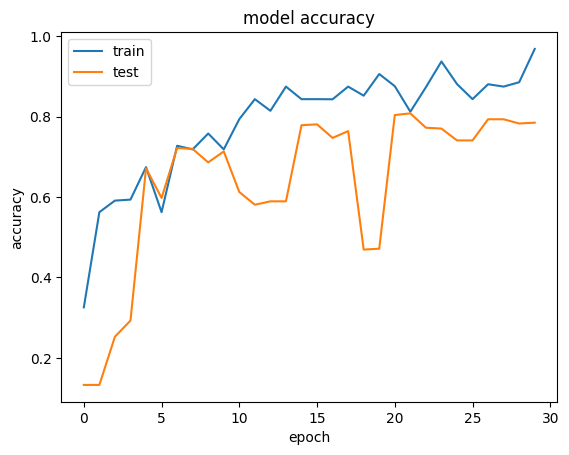

In [ ]:
# Plot model accuracy performance over epochs for training and validation data sets
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Observations**
* Accuracy increased at an inconsistent rate across all 30 training epochs for the improved model with regard to both the training and validation data sets.
  * This inconsistent rate of improvement may be due to the impact of the Dropout layer randomly dropping critical neurons, leading to a temporary reduction in model performance.
* By the 30th epoch, the improved model achieved an Accuracy score of 0.7853 on the validation data set, higher than the score of 0.7600 achieved by the initial model on the same data.
  * This suggests that the improved model will have better performance when making predictions.
* There is still a difference in performance of the improved model on training and validation data sets, suggesting that some level of overfitting on the training data is still occurring.

###Improved model - test data performance

Final performance of the improved model will be evaulated against the reserved test data set.

In [ ]:
# Applying the improved model against the test data set
model2.evaluate(X_test_normalized,(y_test_e))

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8446 - loss: 0.4934 


[0.49124008417129517, 0.8378947377204895]

The initial model achieves an accuracy score of 0.8446 against the test data set.

###Improved model - confusion matrix

Following training, the model can be used to make predictions of specimen classes for each image in the reserved test data set.

In [ ]:
# Using the improved model to predict class labels for images in the test data set
y_pred=model2.predict(X_test_normalized)

# Obtaining the class labels from the predictions and test data set images
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_e,axis=1)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


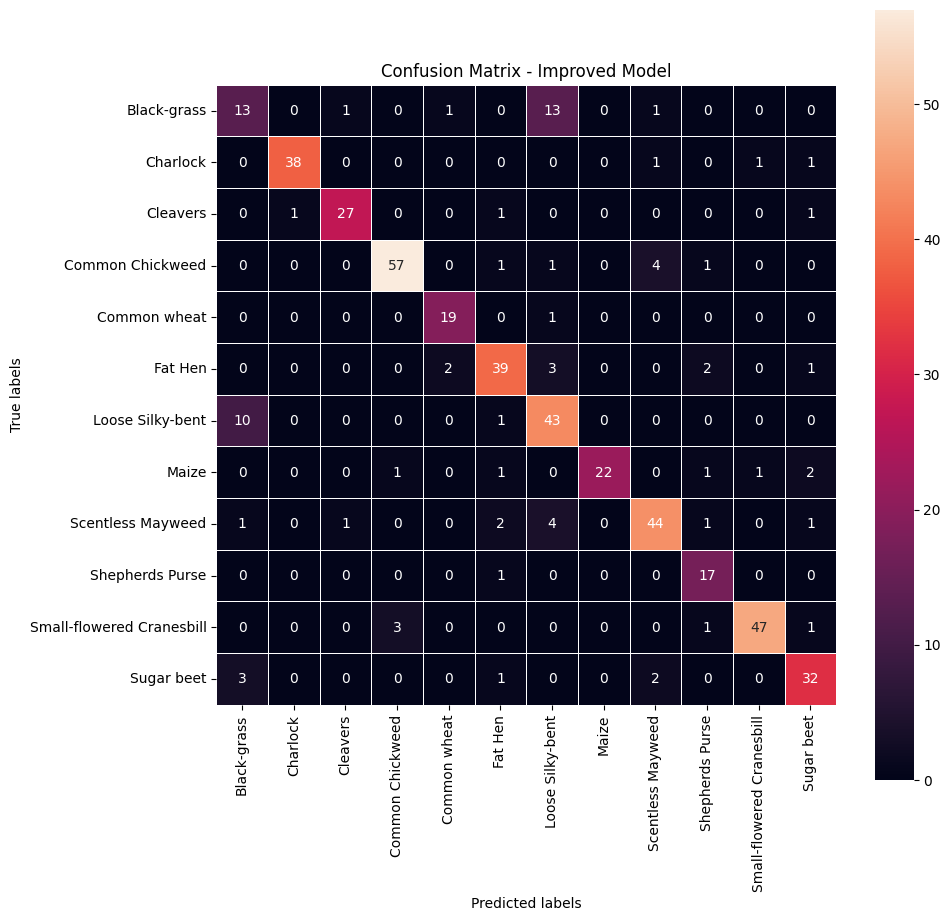

In [ ]:
# Plotting the Confusion Matrix using the tensorflow function
confusion_matrix = tf.math.confusion_matrix(y_pred_arg,y_test_arg)
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix - Improved Model');
ax.xaxis.set_ticklabels(list(lb.classes_),rotation=90)
ax.yaxis.set_ticklabels(list(lb.classes_),rotation=0)
plt.show()

**Observations**

* While no class was predicted perfectly, the number of incorrect predictions on the test data set appears to have reduced for all classes when using the improved model.
* The improved model seems to have some difficulty in differentiating between **Black-grass** and **Loose Silky-bent**, similar to the initial model.

###Improved model - classification report

In [ ]:
# Plotting the classification report
print(classification_report(y_test_arg, y_pred_arg, target_names=lb.classes_))

                           precision    recall  f1-score   support

              Black-grass       0.45      0.48      0.46        27
                 Charlock       0.93      0.97      0.95        39
                 Cleavers       0.90      0.93      0.92        29
         Common Chickweed       0.89      0.93      0.91        61
             Common wheat       0.95      0.86      0.90        22
                  Fat Hen       0.83      0.83      0.83        47
         Loose Silky-bent       0.80      0.66      0.72        65
                    Maize       0.79      1.00      0.88        22
        Scentless Mayweed       0.81      0.85      0.83        52
          Shepherds Purse       0.94      0.74      0.83        23
Small-flowered Cranesbill       0.90      0.96      0.93        49
               Sugar beet       0.84      0.82      0.83        39

                 accuracy                           0.84       475
                macro avg       0.84      0.84      0.83    

**Observations:**

* The improved model achieved an **Accuracy** score of 0.84 when classifying images from the test data set.
  * This test **Accuracy** score is higher than the score of 0.78 achieved by the initial model on the test data set.
* The model achieves the lowest F1-score metric of 0.46 for **Black-grass** in the test data set, similar to the F1-score of 0.34 achieved by the initial model for the same class.
  * This suggests the improved model is also strugging to correctly identify the plant.
* The improved model achieved higher F1 scores than the initial model for all classes.
* Similar to the initial model, the improved model is able to achieve the highest F1-score for the **Charlock** and **Small-flowered Cranesbill** classes.
* The model achieved a perfect **Recall** score with respect to the **Maize** class.

## Final Model

Based on the fact it achieved the highest weighted average **Accuracy** score on the test data set, and achieved higher F1 scores for the majority of classes, the **improved model** which makes use of adjusted learning rates, data augmentation, batch normalization and dropout techniques will be selected as the final model.

### Visualizing the prediction

The performance of the improved model can be demoonstrated by observing the effectiveness of the model in predicting the label for a sample of 3 images from each class in the test data set.

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


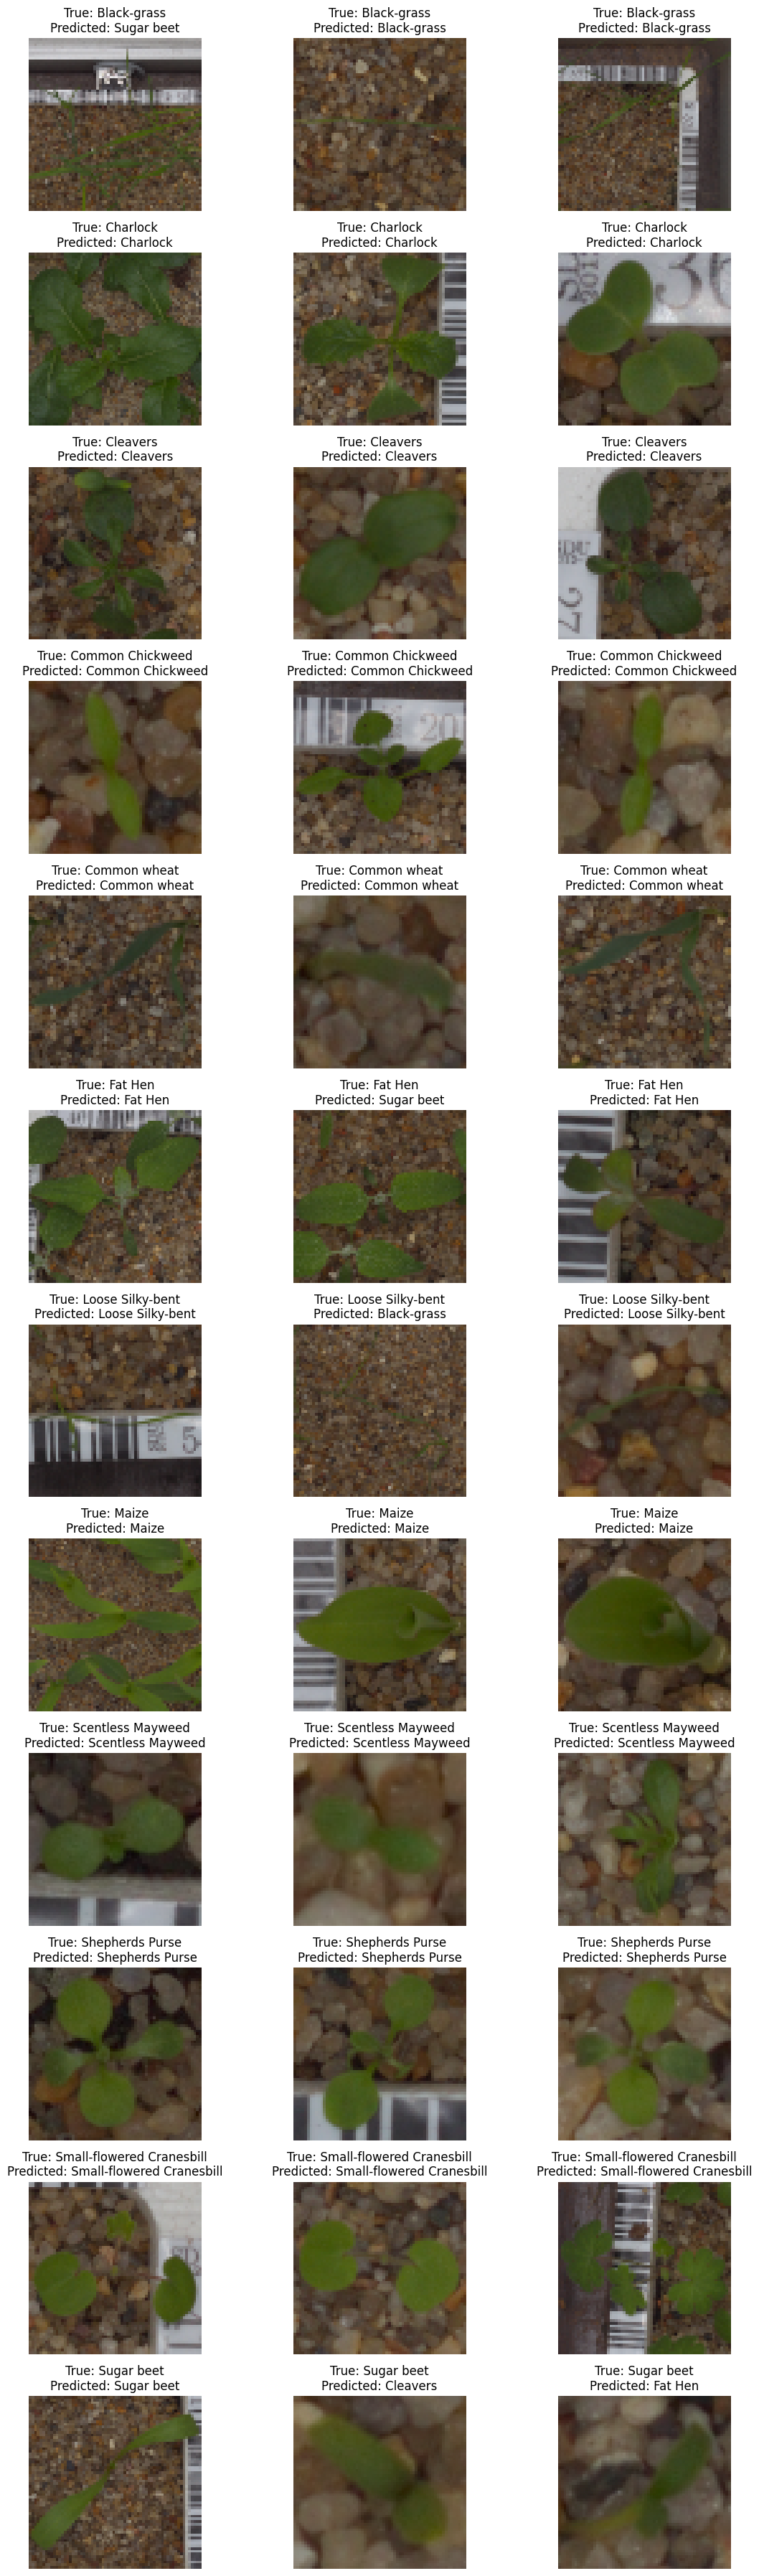

In [ ]:
num_classes = 12
num_images_per_class = 3

# Function to get indices of images for each class
def get_class_indices(y_true, num_images):
    class_indices = {}
    for i, label in enumerate(np.argmax(y_true, axis=1)):
        if label not in class_indices:
            class_indices[label] = []
        if len(class_indices[label]) < num_images:
            class_indices[label].append(i)
    return class_indices

# Function to inverse transform label
def inverse_transform(predictions, idx):
  return lb.inverse_transform(predictions[idx].reshape(1, 12))[0]

class_indices = get_class_indices(y_test_e, num_images_per_class)

# Make predictions
predictions = model2.predict(X_test_normalized)

# Plot images, predictions and actual label for each class
plt.figure(figsize=(12, 3 * num_classes))
for class_label in range(num_classes):
  if class_label in class_indices:
    for i, img_index in enumerate(class_indices[class_label]):
        plt.subplot(num_classes, num_images_per_class, class_label * num_images_per_class + i + 1)
        plt.imshow(X_test[img_index])
        plt.title(f"True: {lb.inverse_transform(y_test_e)[img_index]}\nPredicted: {inverse_transform(predictions,img_index)}")
        plt.axis('off')

plt.tight_layout()
plt.show()

**Observations**
* For the sample imagess selected from each of 12 classes, all the images were predicted correctly by the improved model for 8 of the classes.
* The improved model made incorrect predictions with regards to 1 **Black-grass** image, 1 **Fat Hen** image, 1 **Loose Silky-bent** image and 2 **Sugar beet** images.
  * This reflects the outcomes seen in the confusion matrix, where **Black-grass** and **Loose Silky-bent** in particular had incorrect predictions.
* The images help to display the common characteristics different specimens of each class possess.

## Actionable Insights and Business Recommendations

* This exercise has demonstrated that a Convolutional Neural Network model can be trained and deployed to classify plant specimens based on image alone.

* The improved model could be deployed to predict with a reasonable degree of accuracy the species of a plant seedling based on image alone, assuming the specimen belongs to one of the 12 classes present in the Aarhus University Signal Processing group data set.

* Despite possessing a very similar number of trainable parameters, the improved model achieved a higher **Accuracy** score when classifying specimens from the test data set in comparison to the initial model.
  * Any CNN model developed to classify plant specimens should make use of the techniques introduced with the improved model, including adjustable learning rates, data augmentation, batch normalization and dropout.
  
* The majoity of trainable parameters came not from the convolution layers, but from the first dense neuron layer. This demonstrates the computational efficiency of applying convolution layers to a neural network.

* From the confusion matrices generated by both the initial and improved models, it appears that differentiating between **Black-grass** and **Loose Silky-bent** could present a challenge to CNN models developed for the purpose of plant classification.
  * Specimens flagged as one of these two classes should be double checked manually if either of the existing models developed above are used to classify specimens without any further adjustment of the models.

* There is still scope for improving the performance of the improved model further, through additional tuning of model parameters not carried out in this exercise. This could include:
  * Adjusting the **kernel size** and **number of filters** in each convolution layer.
  * Trying alternative activation functions such as **leaky relu** on kernels in the convolution layers.
  * Adjusting the **pooling size** of the pooling layers.
  * Adding additional convolution and pooling layers to the neural network architecture.
  * Adding additional **batch normalization** layers to the neural network architecture.
  * Adding additional **Dense** neuron layers to the neural network architecture.
  * Altering the number of neurons in each Dense layer of the neural network.
  * Altering the **Dropout** rate and adding additional **Dropout** layers to the neural network architecture.
  * Amending the learning rate of the **Adam** learning optimizer.
  * Initializing weights in the neural network using methods such as **Xavier** or **He**.
  * Altering the **Batch Size** of each training iteration.
  * Amending the number of **Epochs** the model is trained for.

* Alternatively, a significant portion of the CNN architecture could be replaced using **Transfer Learning** with a pre-trained architecture such as VGG16.
  * These architectures provide the benefit of having already been extensively trained on various image sets, and are known for being effective at feature extraction.
  * Using a pre-trained architecture also reduces the number of new parameters that will need to be trained as part of model development.

In [ ]:
#Final code to convert this.ipynb file to html for course submission
%%shell
jupyter nbconvert --to html /content/drive/MyDrive/Study_Materials/PGP-AIML/05.Computer_Vision/Project_5_Plant_Seedling_Classification/DB_submission_Project5_CV_FullCodeNotebook.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/Study_Materials/PGP-AIML/05.Computer_Vision/Project_5_Plant_Seedling_Classification/DB_submission_Project5_CV_FullCodeNotebook.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 11 image(s).
[NbConvertApp] Writing 4000839 bytes to /content/drive/MyDrive/Study_Materials/PGP-AIML/05.Computer_Vision/Project_5_Plant_Seedling_Classification/DB_submission_Project5_CV_FullCodeNotebook.html
